# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [1]:
#all imports
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def training_pipeline(classifier, X, y, param_dict):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
    classifier.fit(X_train, y_train)
    print("train score: ", classifier.score(X_train, y_train))
    validator = GridSearchCV(classifier, param_grid = param_dict)
    validator.fit(X_train, y_train)
    print("best hyperparams: ", validator.best_params_)
    classifier = validator.best_estimator_
    print("test score: ", classifier.score(X_test, y_test))

#1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

In [3]:
# dataset creation
X0 = [(x/10, (x/10)+1) for x in range(10)]
y0 = [0] * len(X0)
X1 = [(x, y-0.05) for x, y in X0]
y1 = [1] * len(X1)
X = np.array(X0+X1)
y = np.array(y0+y1)

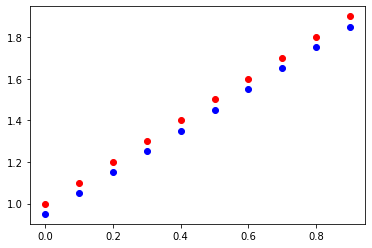

In [4]:
plt.scatter([i[0] for i in X0],
            [i[1] for i in X0], color="red")
plt.scatter([i[0] for i in X1],
            [i[1] for i in X1],  color="blue")
plt.show()

In [5]:
training_pipeline(LogisticRegression(solver='liblinear'), X, y,
                 {'C': np.arange(.01,1,.01)})

train score:  0.5333333333333333
best hyperparams:  {'C': 0.18000000000000002}
test score:  0.4


In [6]:
training_pipeline(KNeighborsClassifier(), X, y,
                 {'n_neighbors': range(1, 10)})

train score:  0.4
best hyperparams:  {'n_neighbors': 2}
test score:  0.0


###Объяснение поведения моделей
Предположение о данных при использовании логистической регрессии заключается в том, что
выборка линейно разделима в пространстве, т.е. один класс находится где-то в одной половине плокости,
а другой - в другой.
При использовании же метода $K$ ближайших соседей, как следует из названия, мы предполагаем, 
что объекты какого-либо класса в основном окружены объектами этого класса, т.е. что объекты "скучкованы"
по классам.  
Исходя из этого, мы можем построить выборки так, чтобы соответственно либо один, либо другой алгоритм
классифакации работал хуже.  

### Принцип построения выборки для задания 1
В данном случае, чтобы k-NN сработал хуже, нам нужно чтобы объекты одного класса находились по одну сторону
какой-нибудь прямой, но в то же время близко к объектам другого класса.  
Например, точку могут лежать на двух параллельных, но близких друг к другу прямых, так что на каждой
прямой только один класс.

#2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

In [7]:
r1 =  [random.uniform(0,2) for i in range(100)]
ang1 = [random.uniform(-np.pi, np.pi) for i in range(100)]
r2 =  [random.uniform(5,5.5) for i in range(100)]
ang2 = [random.uniform(-np.pi, np.pi) for i in range(100)]
X_1 = [(r1[i]*np.cos(ang1[i]), r1[i]*np.sin(ang1[i])) for i in range(100)]
y_1 = [1 for i in range(100)]
X_2 = [(r2[i]*np.cos(ang2[i]), r2[i]*np.sin(ang2[i])) for i in range(100)]
y_2 = [0 for i in range(100)]
X = np.array(X_1+X_2)
y = np.array(y_1+y_2)

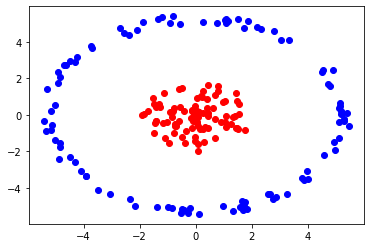

In [8]:
plt.figure()
plt.scatter([i[0] for i in X_1],
            [i[1] for i in X_1],
            color="red")
plt.scatter([i[0] for i in X_2],
            [i[1] for i in X_2], color="blue")
plt.show()

In [9]:
training_pipeline(LogisticRegression(solver='liblinear'), X, y,
                 {'C': np.arange(.01,1,.01)})

train score:  0.5533333333333333
best hyperparams:  {'C': 0.01}
test score:  0.34


In [10]:
training_pipeline(KNeighborsClassifier(), X, y,
                 {'n_neighbors': range(1, 10)})


train score:  1.0
best hyperparams:  {'n_neighbors': 1}
test score:  1.0


### Принцип построения выборки для задания 2
Предположения, лежащие в основе каждого из алгоритмов классификации мы рассмотрели выше.
В отличие от первого задания, теперь чтобы логистическая регрессия сработала хуже, нам нужно чтобы объекты одного класса
были скучкованы в одну или более куч, но при этом чтобы классы, вернее их объекты, не лежали раздельно в двух полуплоскостях
пространстве признаков, т.е. не были линейно разделимы.
Вариантов такого разбиения много, например можно взять две концентрических окружности и вокруг них завести точки одного класса.

#3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance

In [11]:
np.random.seed(42)
## (1, 2) - направление вектора для класса 1:
X_1 = [(1*k , 1*k) for k in np.random.normal(size=(100, ))]
y_1 = [1 for i in range(100)]
np.random.seed(42)
## (0.95, 2.05) - направление вектора для класса 0:
X_2 = [(1*k , 2*k ) for k in np.random.normal(size=(100, ))]
y_2 = [0 for i in range(100)]

No handles with labels found to put in legend.


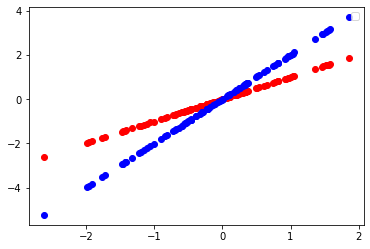

In [12]:
plt.figure()
plt.scatter([i[0] for i in X_1],
            [i[1] for i in X_1], color="red")
plt.scatter([i[0] for i in X_2],
            [i[1] for i in X_2], color="blue")
plt.legend()
plt.show()

In [13]:
training_pipeline(KNeighborsClassifier(metric="euclidean"), X, y,
                 {'n_neighbors': range(1, 10)})

train score:  1.0
best hyperparams:  {'n_neighbors': 1}
test score:  1.0


In [14]:
training_pipeline(KNeighborsClassifier(metric="cosine"), X, y,
                 {'n_neighbors': range(1, 10)})

train score:  0.6533333333333333
best hyperparams:  {'n_neighbors': 7}
test score:  0.52


### Принцип построения выборки для задания 3
Уточним разницу в метриках для одного и того же алгоритма.  
В случае евклидового расстояния, мы используем привычное нам расстояние между точками,
в то время как косинусное расстояние учитывает только углы между векторами до точек из начала
системы координат - то есть направления векторов. Так, все точки на одной прямой проходящей через начало
системы координат будут иметь косинусное расстояние равно нулю между собой.  
Воспользуемся этим свойством и разместим точки двух классов на двух разных прямых, проходящих
через начало системы координат - в косинусном расстоянии они однозначно будут сгруппированы, в то время как
в обычном евклидовом будут погрешности у их пересечения, около начала системы координат.